## **Binary handwritten digit classification in tensorflow**
#### The task at hand is to train a neural netwrok to classify from a set of grayscale images of handwritten 0's and 1's.
- Each pixel of the grayscale image has a value ranging from 0 to 1, image can be represented as a 2D array.
- We have been given a dataset divided into two parts X,Y.
- X contains 1000 grayscale image arrays, each image is of shape 20x20 which has been reshaped to a 1D array of size 400.
- Each row of X thus represents a grayscale image of handwritten 0 or 1.
- Y contains the correct binary classification corresponding to each row of X.

#### Architecture of the neural network used
- Contains 2 hidden layers, 1 input and 1 output layer.
- The first hidden layer has 25 neurons, the second one has 15 neurons.
- The output layer has a single neuron which outputs the probability of the image representing a 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
X=np.load('X.npy')
Y=np.load('y.npy')

In [3]:
print(X.shape)
print(Y.shape)
print(X[0].shape)

(5000, 400)
(5000, 1)
(400,)


X,Y are the MNIST digit classification datasets having 5000 training examples, right now we only want to perform binary classification, the first 1000 examples contain digits 0 and 1. We'll have to extract those examples only.

In [4]:
a=(Y==0)|(Y==1)
a=a.reshape(a.shape[0])
a.shape

(5000,)

In [5]:
#extracting examples containing 0s and 1s only.
X=X[a]
Y=Y[a]
print(X.shape)
print(Y.shape)

(1000, 400)
(1000, 1)


### 1) Visualising the data
We take 64 random arrays from the data set and plot them on the axes along with their correct classification
- ndarray.T returns the transpose of the given array it is here used to straighten the images as shown

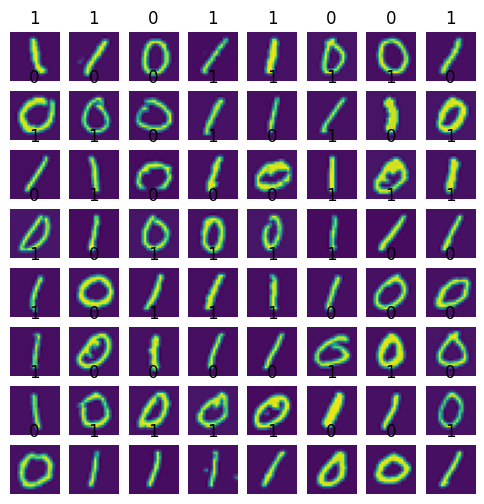

In [6]:
fig, ax=plt.subplots(ncols=8, nrows=8, sharex=True, sharey=True, figsize=(6,6))
for i in ax.flat:
    rand_num=np.random.randint(X.shape[0])    #choosing a random integer from 0 to 5000
    img=np.reshape(X[rand_num], (20,20)).T     #reshaping the corresponding array to its 2D equivalent
    i.imshow(img)     #displaying the image in the corresponding axis
    i.set_title(Y[rand_num][0])
    i.set_axis_off()

### 2) Spliiting the dataset into training and testing parts
        - np.random.shuffle(arr) is used

In [7]:
def train_test_split(X,Y, seed=123):
    if(X.shape[0]!=Y.shape[0]):
        print('shapes not same, cant split')
        return
    num_ex=X.shape[0]
    print(X[:5])
    # creating train, test index arrays
    shuffle_index=np.arange(0, num_ex,1)        #creating a index array
    rand_obj = np.random.RandomState(seed)
    rand_obj.shuffle(shuffle_index)   # shuffling the index array
    X, Y=X[shuffle_index], Y[shuffle_index]
    
    
    X_train, Y_train=X[:int(num_ex*.7)], Y[:int(num_ex*.7)]
    X_test, Y_test=X[int(num_ex*.7):], Y[int(num_ex*.7):]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test= train_test_split(X,Y)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(700, 400) (700, 1) (300, 400) (300, 1)


### 3) Building and training the model

In [8]:
model=Sequential([tf.keras.Input(shape=(400,)), 
                  Dense(units=25, activation="sigmoid"),
                  Dense(units=15, activation="sigmoid"),
                  Dense(units=1, activation="sigmoid")])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy, optimizer=tf.keras.optimizers.Adam(0.01))
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.5068
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1099 
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0412
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0335
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0099
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094
Epoch 13/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0062
Epoch 14/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042
Epoch 15/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078
Epoch 16/20
22/22 

### 4) Testing the model
We'll use the testing set seperated earlier to test the trained model

In [20]:
prediction_array=np.zeros(Y_test.shape)
for i in range(Y_test.shape[0]):
    prediction=model.predict(X_test[i].reshape(1,400), verbose=0)
    if(prediction>=0.5):
        prediction_array[i][0]=1
    else:
        prediction_array[i][0]=0
correct=np.sum(Y_test==prediction_array)
print(f"Accuracy = {correct/Y_test.shape[0]}")

Accuracy = 1.0


In [26]:
predictions=model.predict(X_test)
predictions.shape

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


(300, 1)

In [33]:
predictions=np.array(predictions>=.5)
predictions[:5,0]

array([False, False,  True,  True,  True])